In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Part 1 - EDA**

In [2]:
df = pd.read_json('logins.json')
df

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
#df.set_index('login_time', inplace=True)
#df.sort_index(inplace=True)
df.sort_values(by=['login_time'])
df

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [5]:
df['login_count'] = 1
df

,login_time,login_count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1
...,...,...
93137,1970-04-13 18:50:19,1
93138,1970-04-13 18:43:56,1
93139,1970-04-13 18:54:02,1
93140,1970-04-13 18:57:38,1


In [6]:
df15 = df.groupby([pd.Grouper(key='login_time', freq='15Min')]).sum()
df15

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


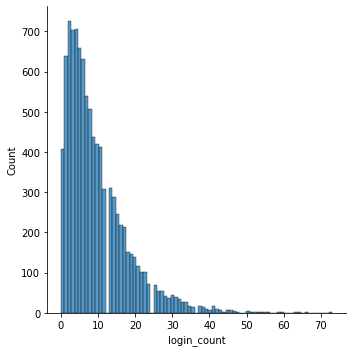

In [7]:
sns.displot(df15.login_count)

<AxesSubplot:xlabel='login_time'>

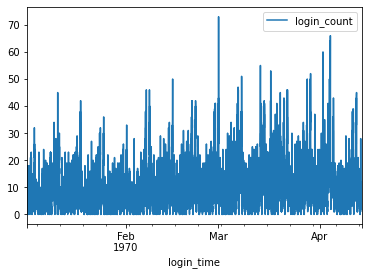

In [8]:
df15.plot()

<AxesSubplot:xlabel='login_time'>

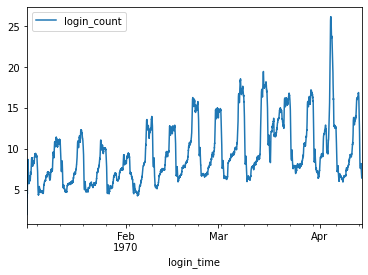

In [9]:
#Daily Cycles
df15.rolling('1D').mean().plot()

**Part 2 - Experiment and Metrics Design**

Q1:

I would use the number of times a driver crosses the toll bridge as the key measure of success because an increase in that amount would imply an increase in activity for driver partners participating in both cities.

Q2:

a)
I would implement the experiment by collecting the data from the driver partners' toll collection system regarding the number of times a driver has crossed the toll bridge over a period of time, including before and after the reimbursement rule was established.

b)
I would conduct a hypothesis test, based on the difference between the mean of the number of times the toll bridge has been crossed before and after the reimbursement rule, in order to see the significance of the difference.

c)
If the results show a significant increase for the mean, then it would mean that the experiment was successful in encouraging drivers to serve both cities, and so the city operations team should continue with the reimbursement rule.
If the results do not show a significant increase for the mean, then it would mean that reimbursing the toll fees does not play much of a factor into why drivers prefer to be exclusive to their own cities and that it may be due to another factor. As such, the city operations team should discontinue with the reimbursement rule. 

**Part 3 - Predictive Modelling**

In [10]:
udf = pd.read_json('ultimate_data_challenge.json')
udf.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [11]:
udf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [12]:
#Fill in null values
udf.avg_rating_of_driver.fillna(udf.avg_rating_of_driver.mean(), inplace=True)
udf.avg_rating_by_driver.fillna(udf.avg_rating_by_driver.mean(), inplace=True)
udf.phone.fillna('Unknown', inplace=True)

In [13]:
udf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [14]:
#Convert to datetime
udf.signup_date = pd.to_datetime(udf.signup_date)
udf.last_trip_date = pd.to_datetime(udf.last_trip_date)

In [15]:
udf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [16]:
udf.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [25]:
#View last_trip_date ranges
udf.sort_values(by='last_trip_date')

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
31425,Winterfell,1,2014-01-01,4.601559,1.00,2014-01-01,iPhone,0.0,False,100.0,4.31,5.0
10729,Winterfell,1,2014-01-01,3.000000,1.00,2014-01-01,iPhone,0.0,False,100.0,19.67,5.0
40336,Winterfell,1,2014-01-01,5.000000,1.00,2014-01-01,iPhone,0.0,False,100.0,5.98,5.0
34828,Astapor,1,2014-01-01,5.000000,1.25,2014-01-01,iPhone,100.0,False,100.0,2.45,5.0
37295,Winterfell,1,2014-01-01,3.000000,1.00,2014-01-01,iPhone,0.0,False,100.0,0.77,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45126,Winterfell,1,2014-01-10,4.600000,1.02,2014-07-01,Android,6.3,False,56.3,6.13,4.6
38651,King's Landing,0,2014-01-13,4.900000,1.00,2014-07-01,iPhone,0.0,True,92.3,10.19,5.0
14473,King's Landing,0,2014-01-02,5.000000,1.00,2014-07-01,Android,0.0,False,100.0,5.06,5.0
22735,Winterfell,0,2014-01-08,5.000000,1.00,2014-07-01,iPhone,0.0,True,75.0,8.71,5.0


Latest date is 2014-07-01, and so we can consider a user to be active if they took a trip anytime between 2014-06-01 and 2014-07-01. 

In [26]:
#Create the target variable
udf['active'] = [1 if date.month >= 6 else 0 for date in udf.last_trip_date]
udf.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [32]:
active_dist = udf.active.value_counts()
active_dist

0    31196
1    18804
Name: active, dtype: int64

In [34]:
#Print out the percentage of observed users that were retained
print(active_dist[1]/(active_dist[0]+active_dist[1]))

0.37608


**Building the Predictive Model**

Since the target variable, active, is a binary variable, this is a classification problem, and so a classifier model should be used.

We can use the Random Forest Classifier.

In [35]:
udf.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [37]:
udf.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [39]:
udf.phone.value_counts()

iPhone     34582
Android    15022
Unknown      396
Name: phone, dtype: int64

In [41]:
#Drop the date variables
udf2 = udf.drop(['signup_date', 'last_trip_date'], axis=1)
udf2.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0


In [43]:
#Convert ultimate_black_user variable from boolean to numerical values
udf2.ultimate_black_user.replace({True: 1, False: 0}, inplace=True)
udf2.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,4.7,1.10,iPhone,15.4,1,46.2,3.67,5.0,1
1,Astapor,0,5.0,1.00,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,0,82.4,3.13,4.9,0


In [44]:
#Perform one-hot encoding
udf2 = pd.get_dummies(udf2)
udf2.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Unknown,phone_iPhone
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,1,0,1,0,0,0,1
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,0,1,0,0,1,0,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,0,1,0,0,0,0,1
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,1,0,1,0,0,0,1
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0,0,0,1,1,0,0


In [45]:
#Train/test split the data
from sklearn.model_selection import train_test_split

X = udf2.drop('active', axis=1)
y = udf2.active

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [46]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

In [53]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Random Forest: Accuracy=%.4f' % (accuracy_score(y_test, y_pred)))
print('Random Forest: f1-score=%.4f' % (f1_score(y_test, y_pred, average='weighted')))
print('Random Forest: Precision=%.4f' % (precision_score(y_test, y_pred)))
print('Random Forest: Recall=%.4f' % (recall_score(y_test, y_pred)))

Random Forest: Accuracy=0.7551
Random Forest: f1-score=0.7538
Random Forest: Precision=0.6894
Random Forest: Recall=0.6532


In [57]:
#Hyperparameter Tuning

from sklearn.model_selection import cross_validate, GridSearchCV, cross_val_score

rf = RandomForestClassifier(random_state=1, n_jobs=-1)
param_grid = {'n_estimators':np.arange(1,20)}
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv = rf_cv.fit(X_train, y_train)
print(rf_cv.best_estimator_)
print(rf_cv.best_score_)

RandomForestClassifier(n_estimators=18, n_jobs=-1, random_state=1)
0.7525333333333333


In [58]:
#Model fitting with hyperparameter tuning
rf = RandomForestClassifier(n_estimators=18, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Random Forest: Accuracy=%.4f' % (accuracy_score(y_test, y_pred)))
print('Random Forest: f1-score=%.4f' % (f1_score(y_test, y_pred, average='weighted')))
print('Random Forest: Precision=%.4f' % (precision_score(y_test, y_pred)))
print('Random Forest: Recall=%.4f' % (recall_score(y_test, y_pred)))

Random Forest: Accuracy=0.7522
Random Forest: f1-score=0.7498
Random Forest: Precision=0.6927
Random Forest: Recall=0.6316


Text(0.5, 1.0, 'Random Forest Classifier: Feature Importances')

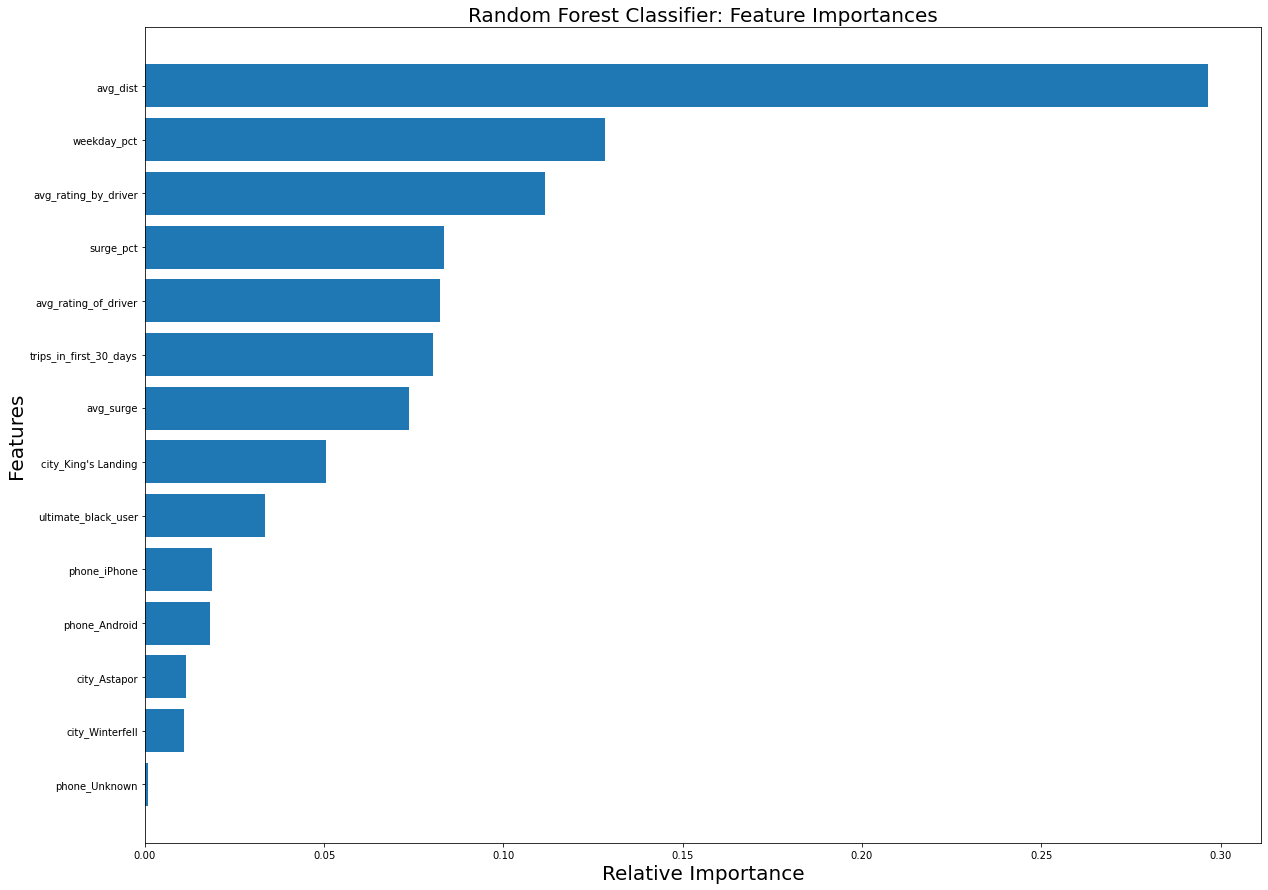

In [59]:
#Feature Importance
feature_rank = pd.DataFrame(list(zip(X, rf.feature_importances_)), columns=['feature', 'score'])
feature_rank = feature_rank.sort_values(by='score')

plt.figure(figsize=(20, 15))
plt.barh(feature_rank.feature, feature_rank.score)
plt.xlabel('Relative Importance', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.title('Random Forest Classifier: Feature Importances', fontsize=20)

Based on the results of feature importance, it appears that avg_dist is by far the most important feature relative to determining whether or not a user is considered active. This may have to do with the fact that users who are active (take trips) would often tend to have a higher amount of distance travelled within a 30 day period than users who are not active (didn't take any trips within 30 days).

In [63]:
#ROC Curve

from sklearn.metrics import auc, roc_curve, roc_auc_score

y_score = rf.predict_proba(X_test)
y_score = y_score[:,1]

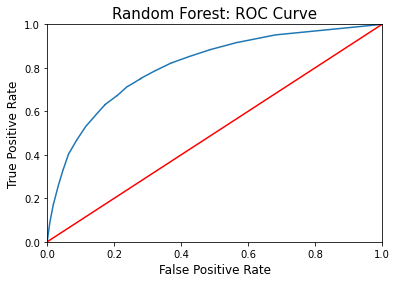

ROC-AUC Score: 0.8076293668140768


In [64]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)

plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], [0, 1], 'r')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Random Forest: ROC Curve',fontsize=15)
plt.axis([0, 1, 0, 1])
plt.show()

print('ROC-AUC Score:', roc_auc_score(y_test, y_score))

With a roc-auc score of 0.8076, this shows that the random forest model is about 61% better than randomly guessing if a user is active in the sixth month.